# Lecture 6 Worksheet

## Introduction

> With a basic framework of _data types_, _marks_, and _encoding channels_, we can concisely create a wide variety of visualizations. In this notebook, we explore each of these elements and show how to use them to create custom statistical graphics.
> 
>_This notebook is part of the [data visualization curriculum](https://github.com/uwdata/visualization-curriculum) at the University of Washington. This notebook series was developed by Jeffrey Heer, Dominik Moritz, Jake VanderPlas, and Brock Craft. Thanks to the UW Interactive Data Lab and Arvind Satyanarayan for their valuable input and feedback! Thanks also to the students of UW CSE512 Spring 2019, the first group to use these notebooks within an integrated course curriculum._

> Copyright (c) 2019, University of Washington
All rights reserved.


**At UBC, I (heavily) adapted these notebooks and added some additional commentary for students in DSCI 531 as part of the lecture worksheets.**

### Recap

Last class we:

- Installed the Altair python package on our systems.
- Created a few basic plots and got familiarized with the Altair syntax.
- Discussed datatypes and encodings in Altair.

### Today's Agenda:
    
- Announcements and Motivation for Altair (10 mins)
- Part 1: Data types, graphical marks, and visual encoding channels (15 mins)
- Part 2: Case Study (20 mins)
- Part 3: Digging deeper into Altair (20 mins)

## Announcements and Motivation for Altair (10 mins)

No worksheet content for this part!

## Part 1: Data Types, Graphical Marks, and Visual Encoding Channels

A visualization represents data using a collection of _graphical marks_ (bars, lines, points, etc.). The attributes of a mark &mdash; such as its position, shape, size, or color &mdash; serve as _channels_ through which we can encode underlying data values.

In [1]:
import pandas as pd
import numpy as np
import altair as alt

import vega_datasets

# use this line if you are in a Jupyter Notebook (not JupyterLab) environment
# alt.renderers.enable('notebook')

# You need to enable json to allow you to work with larger datasets without your notebooks becoming huge
# See Here for details (https://altair-viz.github.io/user_guide/faq.html).
# If you have trouble with blank charts, try commenting this next line out

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### Themes in Altair (under development)

Theme from [this article](https://towardsdatascience.com/consistently-beautiful-visualizations-with-altair-themes-c7f9f889602) that goes into detail about how to create themes and provides an example that I adapted for us:



In [2]:
def mds_special():
    font = "Arial"
    axisColor = "#000000"
    gridColor = "#DEDDDD"
    return {
        "config": {
            "title": {
                "fontSize": 24,
                "font": font,
                "anchor": "start", # equivalent of left-aligned.
                "fontColor": "#000000"
            },
            "axisX": {
                "domain": True,
                #"domainColor": axisColor,
                "gridColor": gridColor,
                "domainWidth": 1,
                "grid": False,
                "labelFont": font,
                "labelFontSize": 12,
                "labelAngle": 0, 
                #"tickColor": axisColor,
                "tickSize": 5, # default, including it just to show you can change it
                #"titleFont": font,
                "titleFontSize": 18,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "X Axis Title (units)", 
            },
            "axisY": {
                "domain": False,
                "grid": True,
                "gridColor": gridColor,
                "gridWidth": 1,
                "labelFont": font,
                "labelFontSize": 12,
                "labelAngle": 0, 
                #"ticks": False, # even if you don't have a "domain" you need to turn these off.
                "titleFont": font,
                "titleFontSize": 18,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "Y Axis Title (units)", 
                # titles are by default vertical left of axis so we need to hack this 
                #"titleAngle": 0, # horizontal
                #"titleY": -10, # move it up
                #"titleX": 18, # move it to the right so it aligns with the labels 
            },
                }
            }

In [3]:
# Now we need to register the custom theme 

# register the custom theme under a chosen name
alt.themes.register('mds_special', mds_special)

# enable the newly registered theme
alt.themes.enable('mds_special')
#alt.themes.enable('none') # to return to default

ThemeRegistry.enable('mds_special')

### Global Development Data (the gapminder dataset returns!)

We will be visualizing global health and population data for a number of countries, over the time period of 1955 to 2005. The data was collected by the [Gapminder Foundation](https://www.gapminder.org/) and shared in [Hans Rosling's popular TED talk](https://www.youtube.com/watch?v=hVimVzgtD6w). If you haven't seen the talk, we encourage you to watch it first!

Let's first load the dataset from the [vega-datasets](https://github.com/vega/vega-datasets) collection into a Pandas data frame.

Note that while you're still learning wrangling in DSCI 523, I hope that these annotated features of the dataframe are helpful in developing your skills to explore data analysis.

In [4]:
from vega_datasets import data as vega_data
data = pd.read_json(vega_data.gapminder.url)

In [5]:
data.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


Let's check how big the data is

In [6]:
data.shape

(693, 6)

693 rows and 6 columns! Let's take a peek at the data content:

In [7]:
data.head() # recall that head prints out the first 5 rows of the dataframe

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


For each `country` and `year` (in 5-year intervals), we have measures of fertility in terms of the number of children per woman (`fertility`), life expectancy in years (`life_expect`), and total population (`pop`).

We also see a `cluster` field with an integer code. What might this represent? We'll try and solve this mystery as we visualize the data!

Let's also create a smaller data frame, filtered down to values for the year 2000 only:

In [8]:
data2000 = data.loc[data['year'] == 2000] 

# That was the .loc syntax Tom talked about in lecture 5

In [9]:
data2000.head(5)

,year,country,cluster,pop,life_expect,fertility
9,2000,Afghanistan,0,23898198,42.129,7.4792
20,2000,Argentina,3,37497728,74.340,2.3500
31,2000,Aruba,3,69539,73.451,2.1240
42,2000,Australia,4,19164620,80.370,1.7560
53,2000,Austria,1,8113413,78.980,1.3820


### Data Types

**We saw these data types already in Lecture 5, but it is worth repeating that you should ALWAYS specify your datatypes in Altair. If you don't, you risk Altair guessing it incorrectly**

The first ingredient in effective visualization is the input data. Data values can represent different forms of measurement. What kinds of comparisons do those measurements support? And what kinds of visual encodings then support those comparisons?

We will start by looking at the basic data types that Altair uses to inform visual encoding choices. These data types determine the kinds of comparisons we can make, and thereby guide our visualization design decisions.

### Nominal (N)

*Nominal* data (also called *categorical* data) consist of category names. 

With nominal data we can compare the equality of values: *is value A the same or different than value B? (A = B)*, supporting statements like “A is equal to B” or “A is not equal to B”.
In the dataset above, the `country` field is nominal.

When visualizing nominal data we should readily be able to see if values are the same or different: position, color hue (blue, red, green, *etc.*), and shape can help. However, using a size channel to encode nominal data might mislead us, suggesting rank-order or magnitude differences among values that do not exist!

### Ordinal (O)

*Ordinal* data consist of values that have a specific ordering.

With ordinal data we can compare the rank-ordering of values: *does value A come before or after value B? (A < B)*, supporting statements like “A is less than B” or “A is greater than B”.
In the dataset above, we can treat the `year` field as ordinal.

When visualizing ordinal data, we should perceive a sense of rank-order. Position, size, or color value (brightness) might be appropriate, where as color hue (which is not perceptually ordered) would be less appropriate.

### Quantitative (Q)

With *quantitative* data we can measure numerical differences among values. There are multiple sub-types of quantitative data:

For *interval* data we can measure the distance (interval) between points: *what is the distance to value A from value B? (A - B)*, supporting statements such as “A is 12 units away from B”.

For *ratio* data the zero-point is meaningful and so we can also measure proportions or scale factors: *value A is what proportion of value B? (A / B)*, supporting statements such as “A is 10% of B” or “B is 7 times larger than A”.

In the dataset above, `year` is a quantitative interval field (the value of year "zero" is subjective), whereas `fertility` and `life_expect` are quantitative ratio fields (zero is meaningful for calculating proportions).
Vega-Lite represents quantitative data, but does not make a distinction between interval and ratio types.

Quantitative values can be visualized using position, size, or color value, among other channels. An axis with a zero baseline is essential for proportional comparisons of ratio values, but can be safely omitted for interval comparisons.

### Temporal (T)

*Temporal* values measure time points or intervals. This type is a special case of quantitative values (timestamps) with rich semantics and conventions (i.e., the [Gregorian calendar](https://en.wikipedia.org/wiki/Gregorian_calendar)). The temporal type in Vega-Lite supports reasoning about time units (year, month, day, hour, etc.), and provides methods for requesting specific time intervals.

Example temporal values include date strings such as `“2019-01-04”` and `“Jan 04 2019”`, as well as standardized date-times such as the [ISO date-time format](https://en.wikipedia.org/wiki/ISO_8601): `“2019-01-04T17:50:35.643Z”`.

There are no temporal values in our global development dataset above, as the `year` field is simply encoded as an integer. For more details about using temporal data in Altair, see the [Times and Dates documentation](https://altair-viz.github.io/user_guide/times_and_dates.html).

### Summary

These data types are not mutually exclusive, but rather form a hierarchy: ordinal data support nominal (equality) comparisons, while quantitative data support ordinal (rank-order) comparisons.

Moreover, these data types do _not_ provide a fixed categorization. Just because a data field is represented using a number doesn't mean we have to treat it as a quantitative type! For example, we might interpret a set of ages (10 years old, 20 years old, etc) as nominal (underage or overage), ordinal (grouped by year), or quantitative (calculate average age).

Now let's examine how to visually encode these data types!


### Encoding Channels

At the heart of Altair is the use of *encodings* that bind data fields (with a given data type) to available encoding *channels* of a chosen *mark* type. In this notebook we'll examine the following encoding channels:

- `x`: Horizontal (x-axis) position of the mark.
- `y`: Vertical (y-axis) position of the mark.
- `size`: Size of the mark. May correspond to area or length, depending on the mark type.
- `color`: Mark color, specified as a [legal CSS color](https://developer.mozilla.org/en-US/docs/Web/CSS/color_value).
- `opacity`: Mark opacity, ranging from 0 (fully transparent) to 1 (fully opaque).
- `shape`: Plotting symbol shape for `point` marks.
- `tooltip`: Tooltip text to display upon mouse hover over the mark.
- `order`: Mark ordering, determines line/area point order and drawing order.
- `column`: Facet the data into horizontally-aligned subplots.
- `row`: Facet the data into vertically-aligned subplots.

For a complete list of available channels, see the [Altair encoding documentation](https://altair-viz.github.io/user_guide/encoding.html).

#### X - Encoding Channel

The `x` encoding channel sets a mark's horizontal position (x-coordinate). In addition, default choices of axis and title are made automatically. In the chart below, the choice of a quantitative data type results in a continuous linear axis scale:

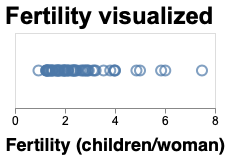

In [10]:
alt.Chart(data2000).mark_point(size=100).encode(
    alt.X('fertility:Q', title='Fertility (children/woman)')
).properties(height=75, title="Fertility visualized")

#### WQ01: What happens when you change the datatype of fertility in the example above? Try: Nominal, Temporal, Ordinal (3 short points)

> Your answers here:
>
> - Nominal: 
> 
> - Temporal: 
> 
> - Ordinal: 

#### WQ02: Try to make the point marks larger, use the `size` parameter for mark_point() (1-2 sentences + code)

> Your answer here (Where did you put the size parameter? How large did you make it?)

#### Y - Encoding Channel

The `y` encoding channel sets a mark's vertical position (y-coordinate). Here we've added the `cluster` field using an ordinal (`O`) data type. The result is a discrete axis that includes a sized band, with a default step size, for each unique value:

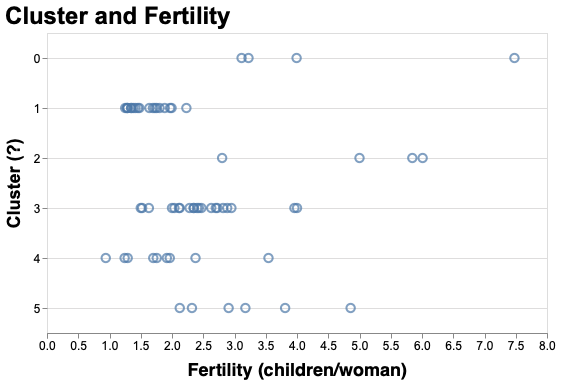

In [11]:
alt.Chart(data2000).mark_point(size=70).encode(
    alt.X('fertility:Q', title='Fertility (children/woman)'),
    alt.Y('cluster:O', title="Cluster (?)")
).properties(title='Cluster and Fertility',height=300,width=500)

# to change the ordering on the y-axis, add: scale=alt.Scale(domain=["5","4","3","2","1","0"])

_What happens to the chart above if you swap the `O` and `Q` field types?_

If we instead add the `life_expect` field as a quantitative (`Q`) variable, the result is a scatter plot with linear scales for both axes:

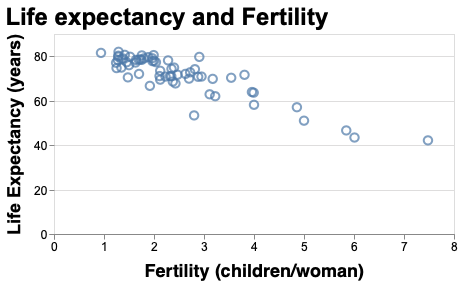

In [12]:
alt.Chart(data2000).mark_point(size=70).encode(
    alt.X('fertility:Q', title='Fertility (children/woman)'),
    alt.Y('life_expect:Q', title='Life Expectancy (years)')
).properties(title='Life expectancy and Fertility', width=400)

By default, axes for linear quantitative scales include zero to ensure a proper baseline for comparing ratio-valued data. In some cases, however, a zero baseline may be meaningless or you may want to focus on interval comparisons. To disable automatic inclusion of zero, configure the scale mapping using the encoding `scale` attribute:

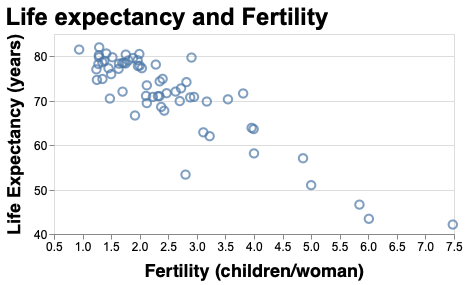

In [13]:
alt.Chart(data2000).mark_point(size=70).encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False, nice=True), title="Fertility (children/woman)"),
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False), title="Life Expectancy (years)")
).properties(title='Life expectancy and Fertility', width=400)

Now the axis scales no longer include zero by default.

#### WQ03: What happens if you also add `nice=False` to one or both of the scale attribute above (1-2 sentences)?

> Your answer here

Some padding still remains, as the axis domain end points are automatically snapped to _nice_ numbers like multiples of 5 or 10.

## Part 2: A Case Study - Bullet holes in surviving planes from World War 2

You have been given a dataset and tasked with trying to solve a problem. In WW2, expensive fighter planes were going down quite frequently due to bullet fire. The military decided to conduct an analysis and surveyed all the surviving planes in an effort to catalogue which regions of the plane should be reinforced. With limited resources, the military could only reinforce a maximum of two zones. Your task is to look at the bullet data for the planes and help determine which areas of the plane should be reinforced.

You're given a schematic of the plane, and told that the workers added a grid to the schematic, divided it up into regions A,B,C,D,E and recorded a value of 1 wherever there was a bullet hole across all the planes that returned. Areas without bullet holes are marked as 0. They gave you a csv file with this information called `bullet_data.csv`. Yes, these WW2 workers are very sophisticated and had access to a computer :-).
     
<img src="plane_img.png" width=200 align="left">

In [14]:
import pandas as pd
# You can download the bullet_data csv file from the 531 student repo:
# https://github.ubc.ca/MDS-2019-20/DSCI_531_viz-1_students/tree/master/participation
# Add this csv file to your participation, then read it in
bullet_data = pd.read_csv('bullet_data.csv')

bullet_data.head()

print("The zones are: {0}".format(sorted(set(bullet_data['zone']))),"\n")

print("Columns are: {0}".format(list(bullet_data.columns)),"\n")

print("Values for 'bullet' column is either 1 or NA","\n")

The zones are: ['A', 'B', 'C', 'D', 'E', 'OutsidePlane', 'Unknown'] 

Columns are: ['x', 'y', 'bullet', 'zone'] 

Values for 'bullet' column is either 1 or NA 



In [15]:
# Let's wrangle the data a bit to try and see what's going on:

# First, only consider the bullet 'hits':

hits_df = bullet_data[bullet_data['bullet']==1]
hits_df.head()

# Then, let's groupby the "zone" and look at the resulting dataframe
# I have "reset" the index of the groupby object so we can plot it with Altair
# You'll learn more about this in DSCI 523 (Wrangling)

summary = hits_df.groupby('zone').count().reset_index()
summary

,zone,x,y,bullet
0,A,83,83,83
1,B,259,259,259
2,C,83,83,83
3,D,47,47,47
4,E,111,111,111
5,Unknown,16,16,16


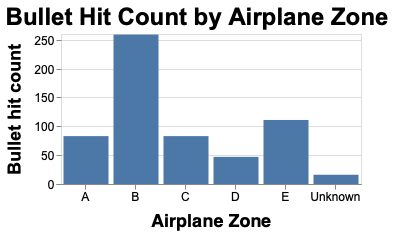

In [16]:
# That's a pretty succinct table that shows us where all the hits are
# Let's plot it:

alt.Chart(summary).encode(alt.X("zone", title="Airplane Zone"),
                          alt.Y("bullet", title="Bullet hit count")
                         ).mark_bar(
                         ).configure_axisX(labelAngle=0
).properties(width=300, height=150, 
             title="Bullet Hit Count by Airplane Zone")

#### WQ04: If you could reinforce two zones, which would you pick and why (3-5 sentences)?
> Your answer here

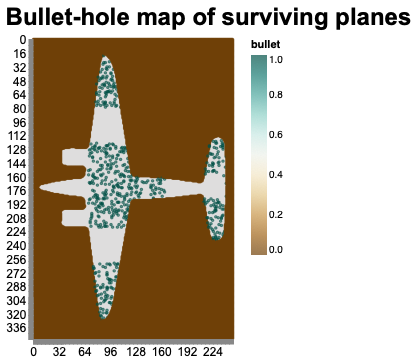

In [17]:
# Let's visualize the bullet holes on top of the outline of a plane

bullets = alt.Chart(bullet_data).mark_point(color='red',size=2).encode(
    alt.X("x:O"),
    alt.Y("y:O"),
    alt.Color("bullet:Q",scale=alt.Scale(scheme='brownbluegreen'))
).properties(width=200,height=300, title= "Bullet-hole map of surviving planes")

bullets

## Part 3: Digging deeper into Altair

Removed for brevity